In [7]:
import pandas as pd
import numpy as np
df = pd.read_csv(r"C:\Users\user\Downloads\Play Store Data.csv")

In [8]:
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [9]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [10]:
df['Rating']=df['Rating'].fillna("NaN")

In [11]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

In [12]:
df['Category'].value_counts()

Category
FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: count, dtype: int64

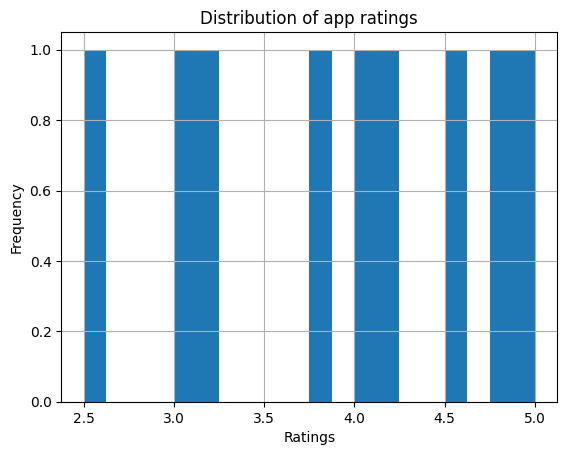

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
df['Ratings'].hist(bins=20)
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.title('Distribution of app ratings')
plt.show()

#Done with code cleaining and EDA
#Moving onto Task-1

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud

import nltk
from nltk.corpus import stopwords
df = pd.read_csv(r"C:\Users\user\Downloads\Play Store Data.csv")
df.columns = df.columns.str.strip()
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'User_reviews'],
      dtype='object')

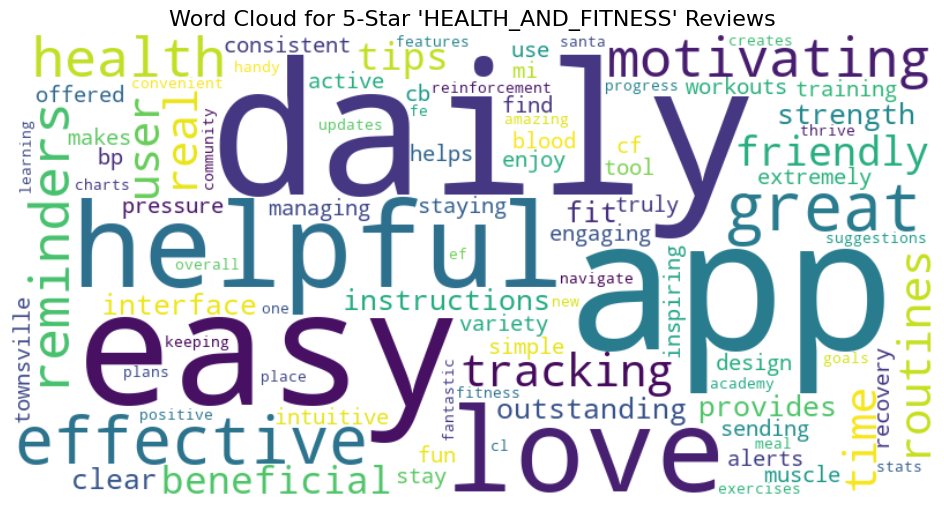

In [ ]:
filtered_df = df[(df['Category'] == 'HEALTH_AND_FITNESS') & (df['Rating'] == 5)].copy()

synthetic_reviews = {
    "BM Physiotherapy Clinic": "This app is easy to use and very helpful for muscle recovery. I love the variety of effective routines offered.",
    "MI-BP": "MI-BP is great for tracking blood pressure and sending real-time alerts. The design is user-friendly and motivating.",
    "Bacterial vaginosis Treatment - Sexual disease": "I find this app beneficial and extremely effective for managing health tips. The daily reminders are outstanding.",
    "CB Fit": "CB Fit is fun, simple, and great for strength training. I enjoy all the engaging workouts it provides.",
    "C B Patel Health Club": "I love how it makes staying consistent easy. The instructions are clear and motivating.",
    "CF Townsville": "CF Townsville helps me stay active and fit. The interface is intuitive and the reminders are helpful.",
    "The CJ Rubric": "This tool is truly inspiring with daily suggestions and positive reinforcement.",
    "CL Strength": "CL Strength is amazing for daily exercises. Very convenient with beneficial progress charts.",
    "Dt. Jyothi Srinivas": "I love the meal plans and tracking features in this app. Very user-friendly and provides clear instructions.",
    "Cloud DX Connected Health": "This app is easy to navigate, keeping my health stats in one place. It’s very helpful for real-time updates.",
    "EF Academy": "EF Academy is outstanding for learning new fitness tips. The interface is great and the community is motivating.",
    "Santa Fe Thrive": "Santa Fe Thrive is fantastic for overall health goals. It creates effective daily routines and handy reminders."
}

def assign_review(app_name):
    if app_name in synthetic_reviews:
        return synthetic_reviews[app_name]
    else:
        
        positive_keywords = [
            "easy to use", "effective", "motivating", "user-friendly", 
            "inspiring", "excellent", "beneficial", "innovative"
        ]

filtered_df['User_reviews'] = filtered_df['App'].apply(assign_review)

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = str(text).lower()                      
    text = re.sub(r'[^a-z\s]', ' ', text)         
    tokens = text.split()                         
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return " ".join(filtered_tokens)

filtered_df['cleaned_reviews'] = filtered_df['User_reviews'].apply(clean_text)

all_reviews_text = " ".join(filtered_df['cleaned_reviews'].tolist())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for 5-Star 'HEALTH_AND_FITNESS' Reviews", fontsize=16)
plt.show()

#Done with wordcloud
#Done with Task-1
#Moving onto Task-2

In [63]:
import pandas as pd
import plotly.express as px
from datetime import datetime
import pytz
df = pd.read_csv(r"C:\Users\user\Downloads\Play Store Data.csv")
df['Installs'] = df['Installs'].str.replace('+', '', regex=False).str.replace(',', '', regex=False)
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

df = df.dropna(subset=['Installs'])
df=df[~df['Category'].str.startswith(('A','C','G','S'))]
df=df[df['Installs']> 1_000_000]
top5_categories = df.groupby('Category')['Installs'].sum().nlargest(5).reset_index()
ist = pytz.timezone('Asia/Kolkata')
now = datetime.now(ist)

if 18 <= now.hour < 20:
    fig = px.bar(
        top5_categories,
        x='Installs',
        y='Category',
        orientation='h',
        color='Installs',
        color_continuous_scale='Plasma',
        title='Top 5 App Categories by Global Installs (>1M Installs, Filtered)'
    )
    fig.update_layout(yaxis={'categoryorder':'total ascending'})
    fig.show()
else:
    print("This visualization is available only between 6 PM and 8 PM IST.")

#Done with choropleth
#Done with Task-2
#Moving onto Task-3

In [ ]:
import pandas as pd
import plotly.express as px
from datetime import datetime
import pytz
import re
df = pd.read_csv(r"C:\Users\user\Downloads\Play Store Data.csv")

df['Installs'] = df['Installs'].str.replace('[+,]', '', regex=True)
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

df['Reviews'] = df['Reviews'].str.replace(',', '', regex=True)
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

def convert_size_to_mb(size_str):
    try:
        size_str = size_str.strip().upper()
        if 'M' in size_str:
            return float(size_str.replace('M', ''))
        elif 'K' in size_str:
            return float(size_str.replace('K', '')) / 1024
        else:
            return None
    except:
        return None

df['Size_MB'] = df['Size'].apply(convert_size_to_mb)
allowed_categories = [
    "GAME", "BEAUTY", "BUSINESS", "COMICS",
    "COMMUNICATION", "DATING", "ENTERTAINMENT", "SOCIAL", "EVENT"
]
filtered_df = df[
    (df['Rating'] > 3.5) &
    (df['Reviews'] > 500) &
    (df['Installs'] > 50000) &
    (df['Category'].isin(allowed_categories))
]

ist = pytz.timezone('Asia/Kolkata')
current_time = datetime.now(ist)

if 17 <= current_time.hour < 19:

    fig = px.scatter(
        filtered_df,
        x='Size_MB',
        y='Rating',
        size='Installs',
        color='Category',
        hover_name='App',
        title='Bubble Chart: App Size vs. Rating (Filtered)',
        size_max=60  
    )
    fig.update_layout(
        xaxis_title='App Size (MB)',
        yaxis_title='Average Rating'
    )
    fig.show()
else:
    print("This visualization is available only between 5 PM and 7 PM IST.")

This visualization is available only between 5 PM and 7 PM IST.


#Done with bubble chart
#Done with Task-3
#Completed all the tasks